# Python – LRU Cache
## Credit:
https://www.geeksforgeeks.org/python-lru-cache/

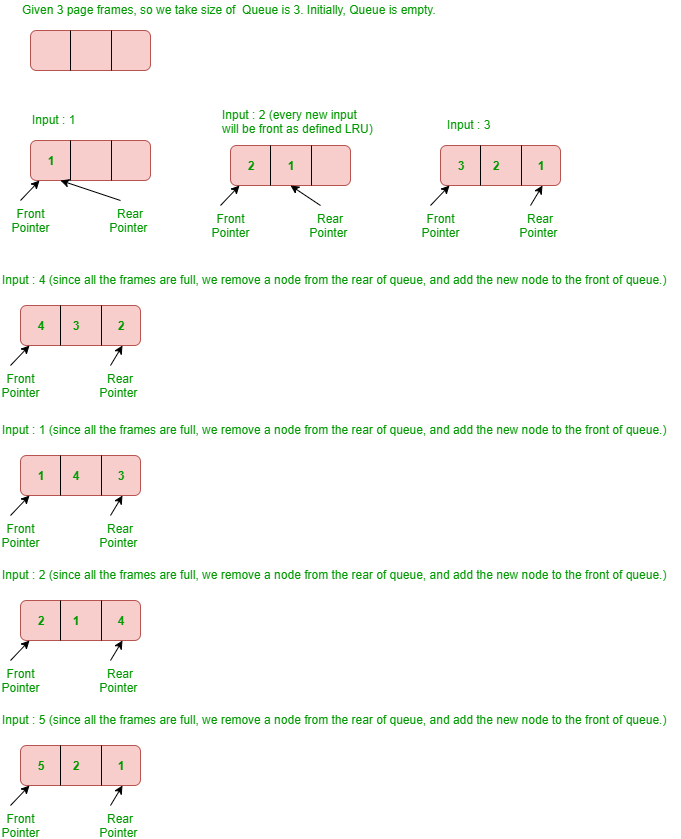

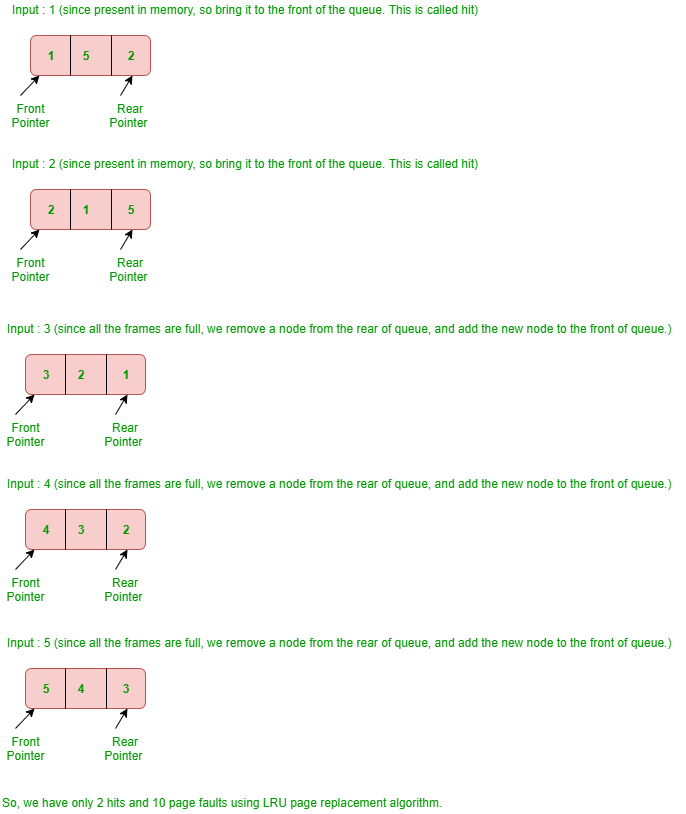

In [1]:
import time

	
class Node:
	
	# Nodes are represented in n
	def __init__(self, key, val):
		self.key = key
		self.val = val
		self.next = None
		self.prev = None


class LRUCache:
	cache_limit = None
	
	# if the DEBUG is TRUE then it
	# will execute
	DEBUG = False

	def __init__(self, func):
		self.func = func
		self.cache = {}
		self.head = Node(0, 0)
		self.tail = Node(0, 0)
		self.head.next = self.tail
		self.tail.prev = self.head

	def __call__(self, *args, **kwargs):
		
		# The cache presents with the help
		# of Linked List
		if args in self.cache:
			self.llist(args)
			
			if self.DEBUG == True:
				return f'Cached...{args}\n{self.cache[args]}\nCache: {self.cache}'
			return self.cache[args]

		# The given cache keeps on moving.
		if self.cache_limit is not None:
			
			if len(self.cache) > self.cache_limit:
				n = self.head.next
				self._remove(n)
				del self.cache[n.key]

		# Compute and cache and node to see whether
		# the following element is present or not
		# based on the given input.
		result = self.func(*args, **kwargs)
		self.cache[args] = result
		node = Node(args, result)
		self._add(node)
		
		if self.DEBUG == True:
			return f'{result}\nCache: {self.cache}'
		return result

	# Remove from double linked-list - Node.
	def _remove(self, node):
		p = node.prev
		n = node.next
		p.next = n
		n.prev = p

	# Add to double linked-list - Node.
	def _add(self, node):
		p = self.tail.prev
		p.next = node
		self.tail.prev = node
		node.prev = p
		node.next = self.tail

	# Over here the result task is being done
	def llist(self, args):
		current = self.head
		
		while True:
			
			if current.key == args:
				node = current
				self._remove(node)
				self._add(node)
				
				if self.DEBUG == True:
					del self.cache[node.key]
					self.cache[node.key] = node.val
				break
			
			else:
				current = current.next


# Default Debugging is FALSE. For
# execution of DEBUG is set to TRUE
LRUCache.DEBUG = True

# The DEFAULT test limit is NONE.
LRUCache.cache_limit = 3


@LRUCache
def ex_func_01(n):
	print(f'Computing...{n}')
	time.sleep(1)
	return n


print(f'\nFunction: ex_func_01')
print(ex_func_01(1))
print(ex_func_01(2))
print(ex_func_01(3))
print(ex_func_01(4))
print(ex_func_01(1))
print(ex_func_01(2))
print(ex_func_01(5))
print(ex_func_01(1))
print(ex_func_01(2))
print(ex_func_01(3))
print(ex_func_01(4))
print(ex_func_01(5))



Function: ex_func_01
Computing...1
1
Cache: {(1,): 1}
Computing...2
2
Cache: {(1,): 1, (2,): 2}
Computing...3
3
Cache: {(1,): 1, (2,): 2, (3,): 3}
Computing...4
4
Cache: {(1,): 1, (2,): 2, (3,): 3, (4,): 4}
Cached...(1,)
1
Cache: {(2,): 2, (3,): 3, (4,): 4, (1,): 1}
Cached...(2,)
2
Cache: {(3,): 3, (4,): 4, (1,): 1, (2,): 2}
Computing...5
5
Cache: {(4,): 4, (1,): 1, (2,): 2, (5,): 5}
Cached...(1,)
1
Cache: {(4,): 4, (2,): 2, (5,): 5, (1,): 1}
Cached...(2,)
2
Cache: {(4,): 4, (5,): 5, (1,): 1, (2,): 2}
Computing...3
3
Cache: {(5,): 5, (1,): 1, (2,): 2, (3,): 3}
Computing...4
4
Cache: {(1,): 1, (2,): 2, (3,): 3, (4,): 4}
Computing...5
5
Cache: {(2,): 2, (3,): 3, (4,): 4, (5,): 5}
